<a href="https://colab.research.google.com/github/resthiana12/Kelainan_Psikologis_CNN/blob/main/MJain_2_Depresi_1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Install Package yang Dibutuhkan**

In [67]:
pip install emot

In [68]:
pip install emoji

In [69]:
pip install sastrawi

In [70]:
pip install swifter

**#Load Library**

In [71]:
#load library
import nltk                             
import matplotlib.pyplot as plt           
import random  
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
import numpy as np
import pandas as pd
import re                                  
import string                             
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
from nltk import pos_tag, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import words
import emoji
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
from wordcloud import WordCloud 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


**Preprocessing**

In [72]:
stop = pd.read_csv("drive/MyDrive/stopwords.txt", names= ["stopwords"], header = None)
stop['stopwords']
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('indonesian'))
# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
user_stopwords = ['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'na',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'ber',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 's','lhaa',
                       'qrt', 'd', 'ayyy', 'eptember', 'tu', 'kat', 'd',
                        'bdhshshhs', 'denngan','ba', 'ah', 'tuu', 'kaann', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 'je',
                       '&amp', 'yah', 'x', 'xf', 'xe', 'first', 'second',
                        'the', 'to', 'yaa', 'dirut', 'la', 'pon']
alphabets = list(string.ascii_lowercase)
stop_words_fix = stop_words + alphabets + stop['stopwords'].to_list()

# Function to remove punctuations, links, emojis, and stop words
def preprocessTweets(tweet):
    tweet = tweet.lower()  #has to be in place
    #Remove 'b
    tweet = re.sub(r"b'", '', tweet)
    # Remove urls dan trash
    tweet = re.sub(r"http\S+|\\x\S+|www\S+|https\S+|dot|com", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words_fix]
    filtered_words = [w for w in tweet_tokens if w not in user_stopwords]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them

def tokenkan(text):    
  tokens = nltk.tokenize.word_tokenize(text)
  return tokens

normalizad_word = pd.read_excel("drive/MyDrive/normalisasi.xlsx")
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

def stopwords_removal(words):
    return [word for word in words if word not in stop_words]

def remove_punct(text):
  text_nopunct = ''
  text_nopunct = re.sub('['+string.punctuation+']', '', text)
  return text_nopunct

In [73]:
#data = pd.read_csv('drive/MyDrive/data_noemoticon/Depresi_Non_1000_Preprocessed.csv')
#data.drop(['Unnamed: 0', 'Postingan', 'Postingan_Tokenkan', 'Postingan_Normalized'], axis=1, inplace=True)
#data.columns = ['Label', 'Text']
#data['Text'] = data['Text'].apply(remove_punct)
#data.head()

In [74]:
#labels = df['Label']

In [75]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=2)

# Import Libraries

In [76]:
import gensim.models.keyedvectors as word2vec #need to use due to depreceated model
from nltk.tokenize import RegexpTokenizer

from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM, Conv1D, Dense, Flatten, MaxPooling1D, Dropout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve,  roc_auc_score, classification_report


import logging

In [77]:
logging.basicConfig(format='%(asctime)s : %(levelname) s : %(message)s', level=logging.INFO)

#Set random seed
np.random.seed(24)

#Get Dataset

0    501
1    499
Name: Sentiment, dtype: int64
['orang', 'tua', 'depresi', 'sulit', 'orangorang', 'gen', 'x', 'erti', 'kendali', 'sembuh', 'berjalanjalan', 'pikir', 'sibuk']


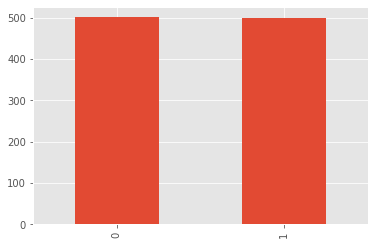

In [78]:
#read CSV file containing tweets and labels, using Pandas , to get a dataframe
tweetsData = pd.read_csv('drive/MyDrive/data_noemoticon/Depresi_Non_1000_Preprocessed.csv')
tweetsData.drop(['Unnamed: 0', 'Postingan', 'Postingan_Tokenkan', 'Postingan_Normalized'], axis=1, inplace=True)
tweetsData.columns = ['Sentiment', 'SentimentText']
tweetsData['SentimentText'] = tweetsData['SentimentText'].apply(remove_punct)
tweetsData.head()

#Dividing the dataset into features and lables
tweets = tweetsData['SentimentText']
labels = tweetsData['Sentiment']

#check the distribution of lebels

labels_count = labels.value_counts()
labels_count.plot(kind="bar")
print(labels.value_counts())

#Looks like the distribution is even

#Lower and split the dialog
#and use regular expression to keep only letters we will use nltk Regular expression package
tkr = RegexpTokenizer('[a-zA-Z@]+')

tweets_split = []

for i, line in enumerate(tweets):
    #print(line)
    tweet = str(line).lower().split()
    tweet = tkr.tokenize(str(tweet))
    tweets_split.append(tweet)

print(tweets_split[1])

In [79]:
'''
Use pretrained Word2Vec model from google but trim the word list to 50,000 compared to 3,000,000 in the original
Google pretrained model
'''

w2vModel = word2vec.KeyedVectors.load_word2vec_format('drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=50000)

#Convert words to integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets_split)
X = tokenizer.texts_to_sequences(tweets_split)

#length of tweet to consider
maxlentweet = 30
#add padding
X = pad_sequences(X, maxlen=maxlentweet)
print(X.shape)

#create a embedding layer using Google pre triained word2vec (50000 words)
embedding_layer = Embedding(input_dim=w2vModel.syn0.shape[0], output_dim=w2vModel.syn0.shape[1], weights=[w2vModel.syn0], 
                            input_length=X.shape[1])


2021-08-30 23:30:30,509 : INFO : loading projection weights from drive/MyDrive/GoogleNews-vectors-negative300.bin.gz
2021-08-30 23:31:25,204 : INFO : loaded (50000, 300) matrix from drive/MyDrive/GoogleNews-vectors-negative300.bin.gz


(1000, 30)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


In [96]:
#create model combining LSTM with 1D Convonutional layer and MaxPool layer

lstm_out = 150

model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='causal'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.7))
model.add(LSTM(units=lstm_out))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 300)           15000000  
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 30, 64)            96064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 15, 64)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 150)               129000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
#split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size= 0.1, random_state = 24)

In [98]:
#fit model
batch_size = 32
history = model.fit(X_train, Y_train, epochs=5, verbose=1, batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/5
29/29 [==============================] - 8s 216ms/step - loss: 0.6091 - accuracy: 0.7167 - val_loss: 0.4258 - val_accuracy: 0.9100
Epoch 2/5
29/29 [==============================] - 6s 200ms/step - loss: 0.2432 - accuracy: 0.9478 - val_loss: 0.1363 - val_accuracy: 0.9700
Epoch 3/5
29/29 [==============================] - 6s 199ms/step - loss: 0.0699 - accuracy: 0.9822 - val_loss: 0.0962 - val_accuracy: 0.9700
Epoch 4/5
29/29 [==============================] - 6s 199ms/step - loss: 0.0277 - accuracy: 0.9956 - val_loss: 0.0546 - val_accuracy: 0.9900
Epoch 5/5
29/29 [==============================] - 6s 198ms/step - loss: 0.0188 - accuracy: 0.9978 - val_loss: 0.0467 - val_accuracy: 0.9900


In [99]:
#analyze the results
score, acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size=batch_size)
y_pred = model.predict(X_test)

4/4 - 0s - loss: 0.0467 - accuracy: 0.9900


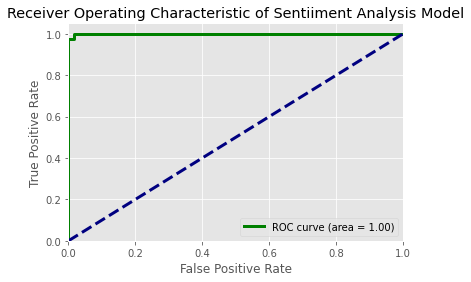

In [100]:
#ROC AUC curve
rocAuc = roc_auc_score(Y_test, y_pred)

falsePositiveRate, truePositiveRate, _ = roc_curve(Y_test, y_pred)

plt.figure()

plt.plot(falsePositiveRate, truePositiveRate, color='green',
         lw=3, label='ROC curve (area = %0.2f)' % rocAuc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Sentiiment Analysis Model')
plt.legend(loc="lower right")
plt.show()

In [101]:
#Other accuracy metrices
y_pred = (y_pred > 0.5)

In [102]:
#confusion metrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

#F1 Score, Recall and Precision
print(classification_report(Y_test, y_pred, target_names=['mengidap', 'non']))

[[56  1]
 [ 0 43]]
              precision    recall  f1-score   support

    mengidap       1.00      0.98      0.99        57
         non       0.98      1.00      0.99        43

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



Text(33.0, 0.5, 'y_pred')

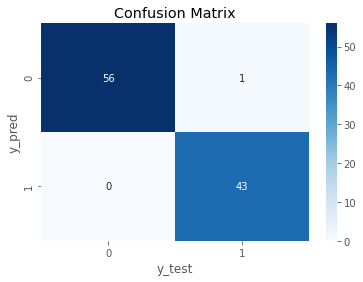

In [103]:
import seaborn as sns
cm=confusion_matrix(Y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt='')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [88]:
import matplotlib.pyplot as plt

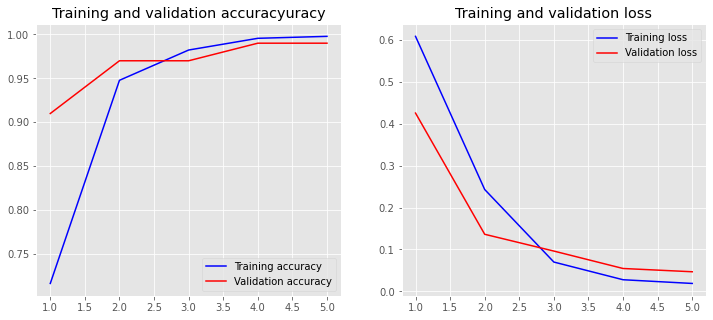

In [104]:
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training accuracy')
    plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracyuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [109]:
model.save('drive/MyDrive/data_noemoticon/mjain_2_depresi_1000_cnn_lstm.h5')

In [105]:
def text_preprocessing(text):
  df['preprocess_awal'] = text.apply(preprocessTweets)
  df['tokenkan'] = df['preprocess_awal'].apply(tokenkan)
  df['normalized'] = df['tokenkan'].apply(normalized_term)
  df['normalized'] = df['normalized'].apply(stopwords_removal)

  # create stemmer
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  # stemmed
  def stemmed_wrapper(term):
      return stemmer.stem(term)

  term_dict = {}

  for document in df['normalized']:
      for term in document:
          if term not in term_dict:
              term_dict[term] = ' '
              
  #print(len(term_dict))
  print("------------------------")

  for term in term_dict:
      term_dict[term] = stemmed_wrapper(term)
      print(term,":" ,term_dict[term])
      
  #print(term_dict)
  print("------------------------")


  # apply stemmed term to dataframe
  def get_stemmed_term(document):
      return [term_dict[term] for term in document]

  df['stemmed'] = df['normalized'].swifter.apply(get_stemmed_term)
  #print(df['stemmed'])

  def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

  df['stemmed'] = df['stemmed'].astype(str)
  df['stemmed'] = df['stemmed'].apply(remove_punct)

In [147]:
X = 'mau dong aku lg butuh acc'
datax = {'Postingan':[X]}
df = pd.DataFrame(datax)
text_preprocessing(df['Postingan'])
df.head()

------------------------
kurangnya : kurang
pemahaman : paham
signifikan : signifikan
menyebabkan : sebab
kecemasan : cemas
depresi : depresi
kesepian : sepi
mudah : mudah
membandingkan : banding
menghapuskan : hapus
------------------------


Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

,Postingan,preprocess_awal,tokenkan,normalized,stemmed
0,Kurangnya pemahaman ini adalah bagian kecil ta...,kurangnya pemahaman ini adalah bagian kecil ta...,"[kurangnya, pemahaman, ini, adalah, bagian, ke...","[kurangnya, pemahaman, signifikan, menyebabkan...",kurang paham signifikan sebab cemas depresi se...


In [151]:
X_sample = tokenizer.texts_to_sequences(df['stemmed'])
print(X_sample)
X_sample = pad_sequences(X_sample, maxlen=30)

y_sample = model.predict(X_sample)
print(y_sample)
hasil = np.argmax(y_sample)
print(hasil)
if hasil == 0 :
  print('tidak mengidap gangguan psikologis')
else:
  print('mengidap gangguan psikologis')

[[301, 995, 3, 1, 302, 43, 569, 43, 234]]
[[0.9999883]]
0
tidak mengidap gangguan psikologis
